In [1]:
import os
os.chdir("{}/..".format(os.getcwd()))
os.getcwd()


'/home/lukas/Projects/dmc2019'

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
#from scripts.utils import *


In [13]:
%run utils.ipynb

In [9]:
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
df_train = pd.read_csv("../data/train.csv", sep="|")

In [14]:
scaler = StandardScaler()
scaler.fit(df_train)
transformer = DataTransformer(scaler)
df_train = transformer.add_features(df_train)

/home/lukas/Projects/dmc2019/venv/lib/python3.5/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [2]:
df_test_pl = pd.read_csv("../data/test_pl.csv", sep="|")
df_test_pl.head(5)

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,totalScannedLineItems,fraud
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429,7.0,0
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259,27.0,0
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000,1.0,0
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857,14.0,0
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526,19.0,0


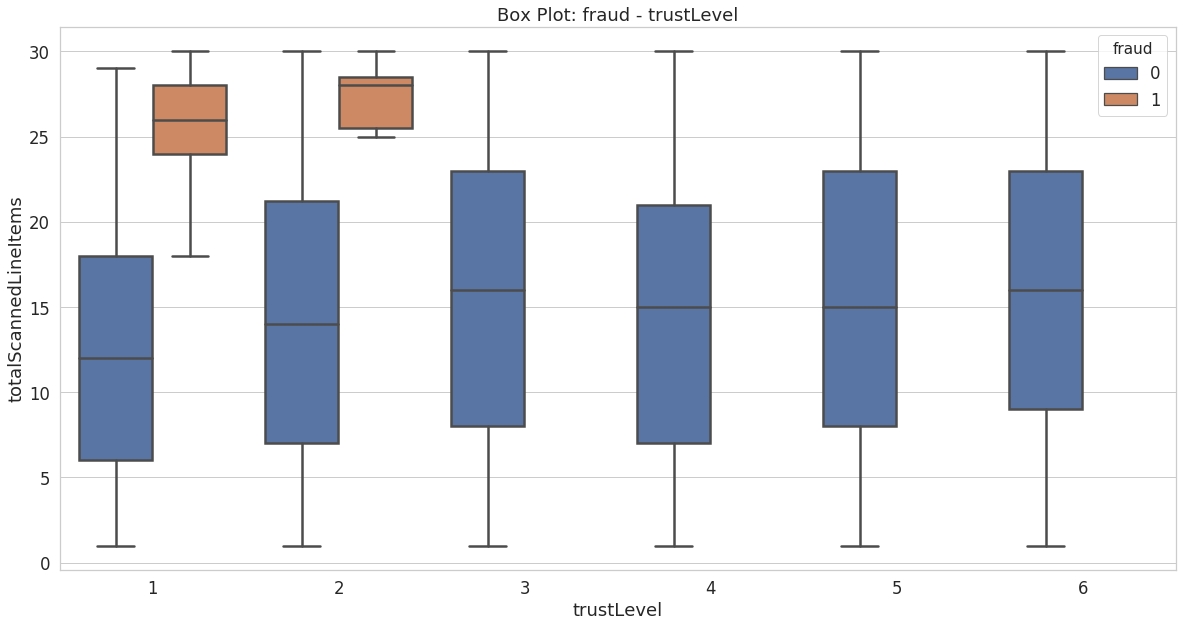

In [27]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x="trustLevel", y='totalScannedLineItems',hue='fraud', data=df_train)
plt.title("Box Plot: fraud - trustLevel")
plt.show()

In [7]:
df_train.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,totalScannedLineItems
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0,29.0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0,14.0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0,13.0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0,29.0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0,27.0


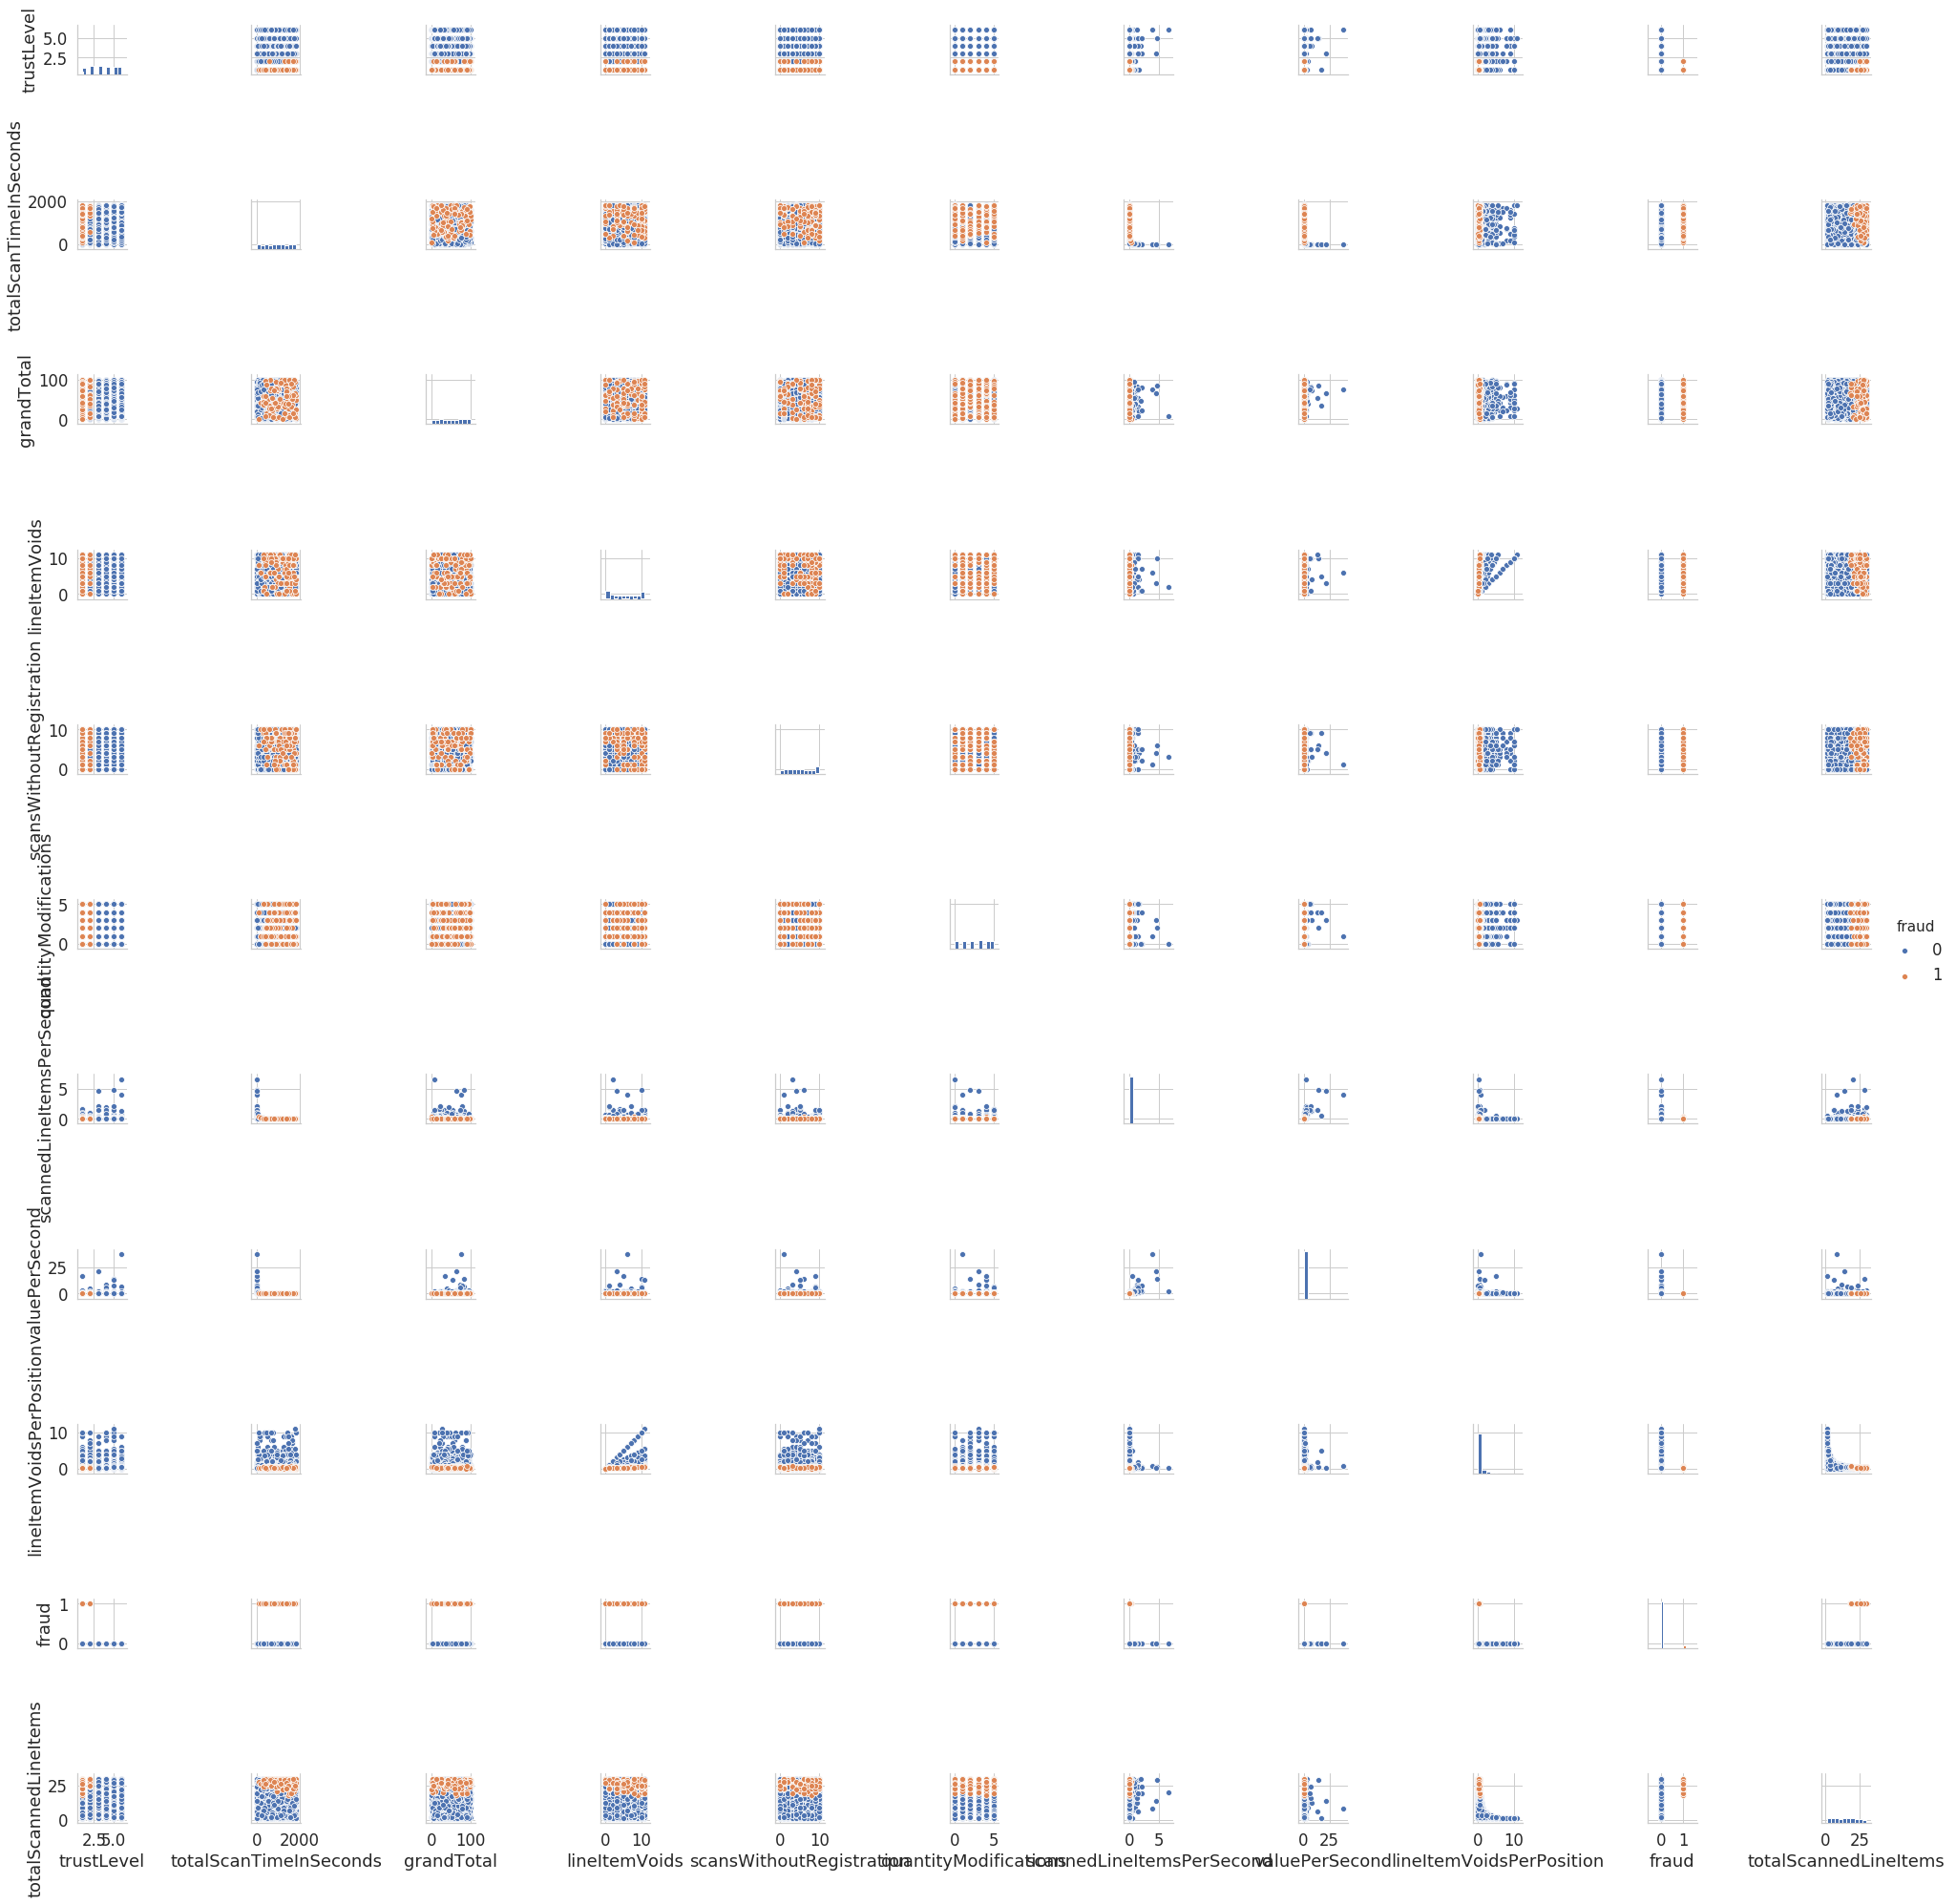

In [14]:
sns_plot =sns.pairplot(df_train, diag_kind='hist', hue='fraud',size=2.5)

In [15]:
sns_plot.savefig("output.png")

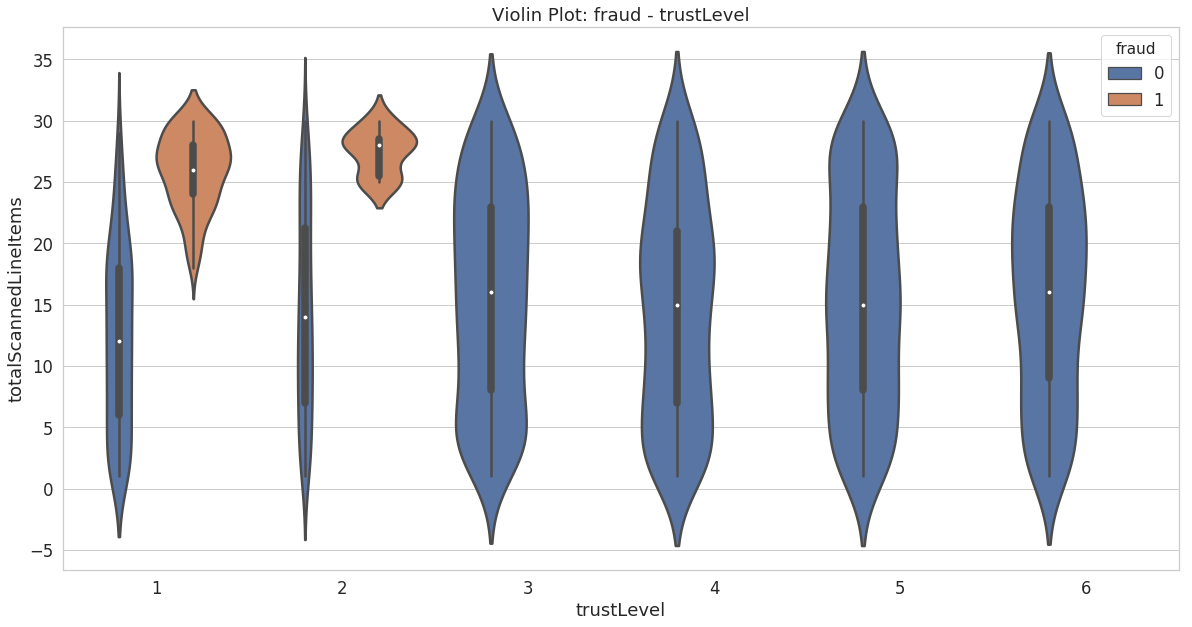

In [28]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.violinplot(x="trustLevel", y='totalScannedLineItems',hue='fraud', data=df_train)
plt.title("Violin Plot: fraud - trustLevel")
plt.show()

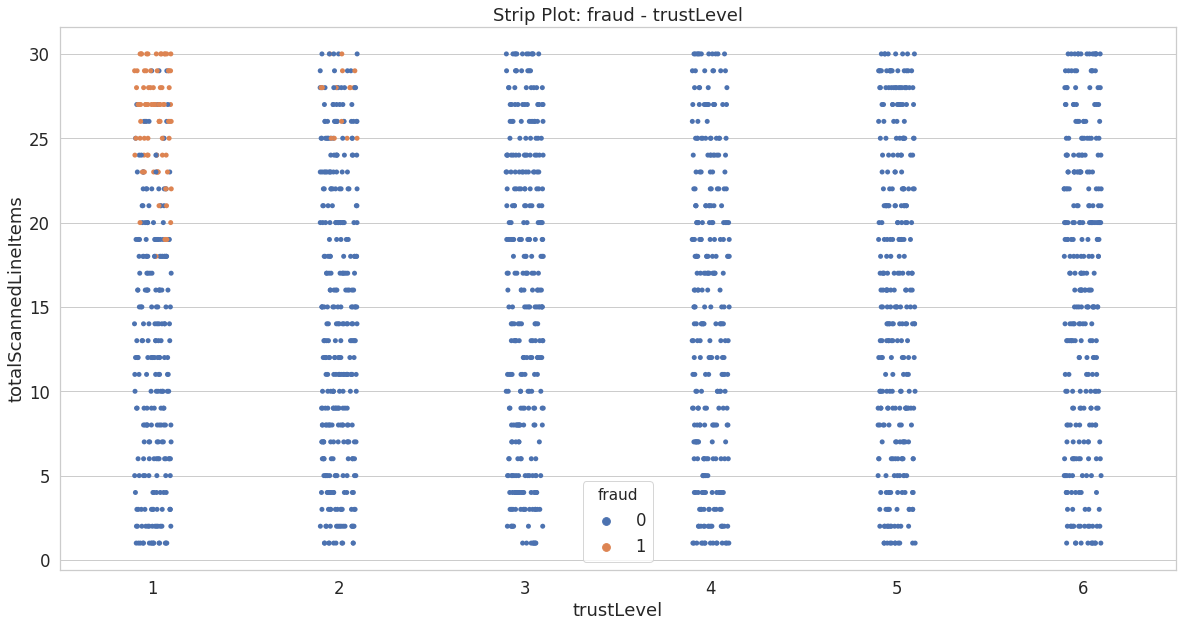

In [29]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.stripplot(x="trustLevel", y='totalScannedLineItems',hue='fraud', data=df_train)
plt.title("Strip Plot: fraud - trustLevel")
plt.show()

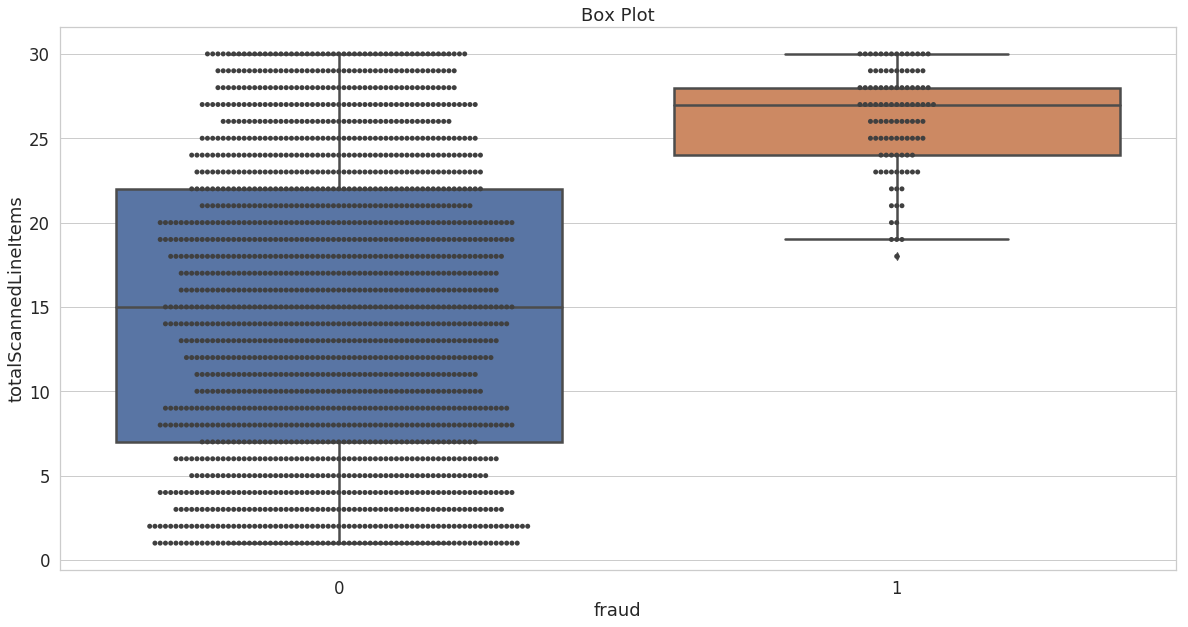

In [30]:
f,ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x="fraud", y='totalScannedLineItems', data=df_train)
ax = sns.swarmplot(x="fraud", y="totalScannedLineItems", data=df_train, color=".25")
plt.title("Box Plot")
plt.show()

## Plotting Box-Plots for each feature

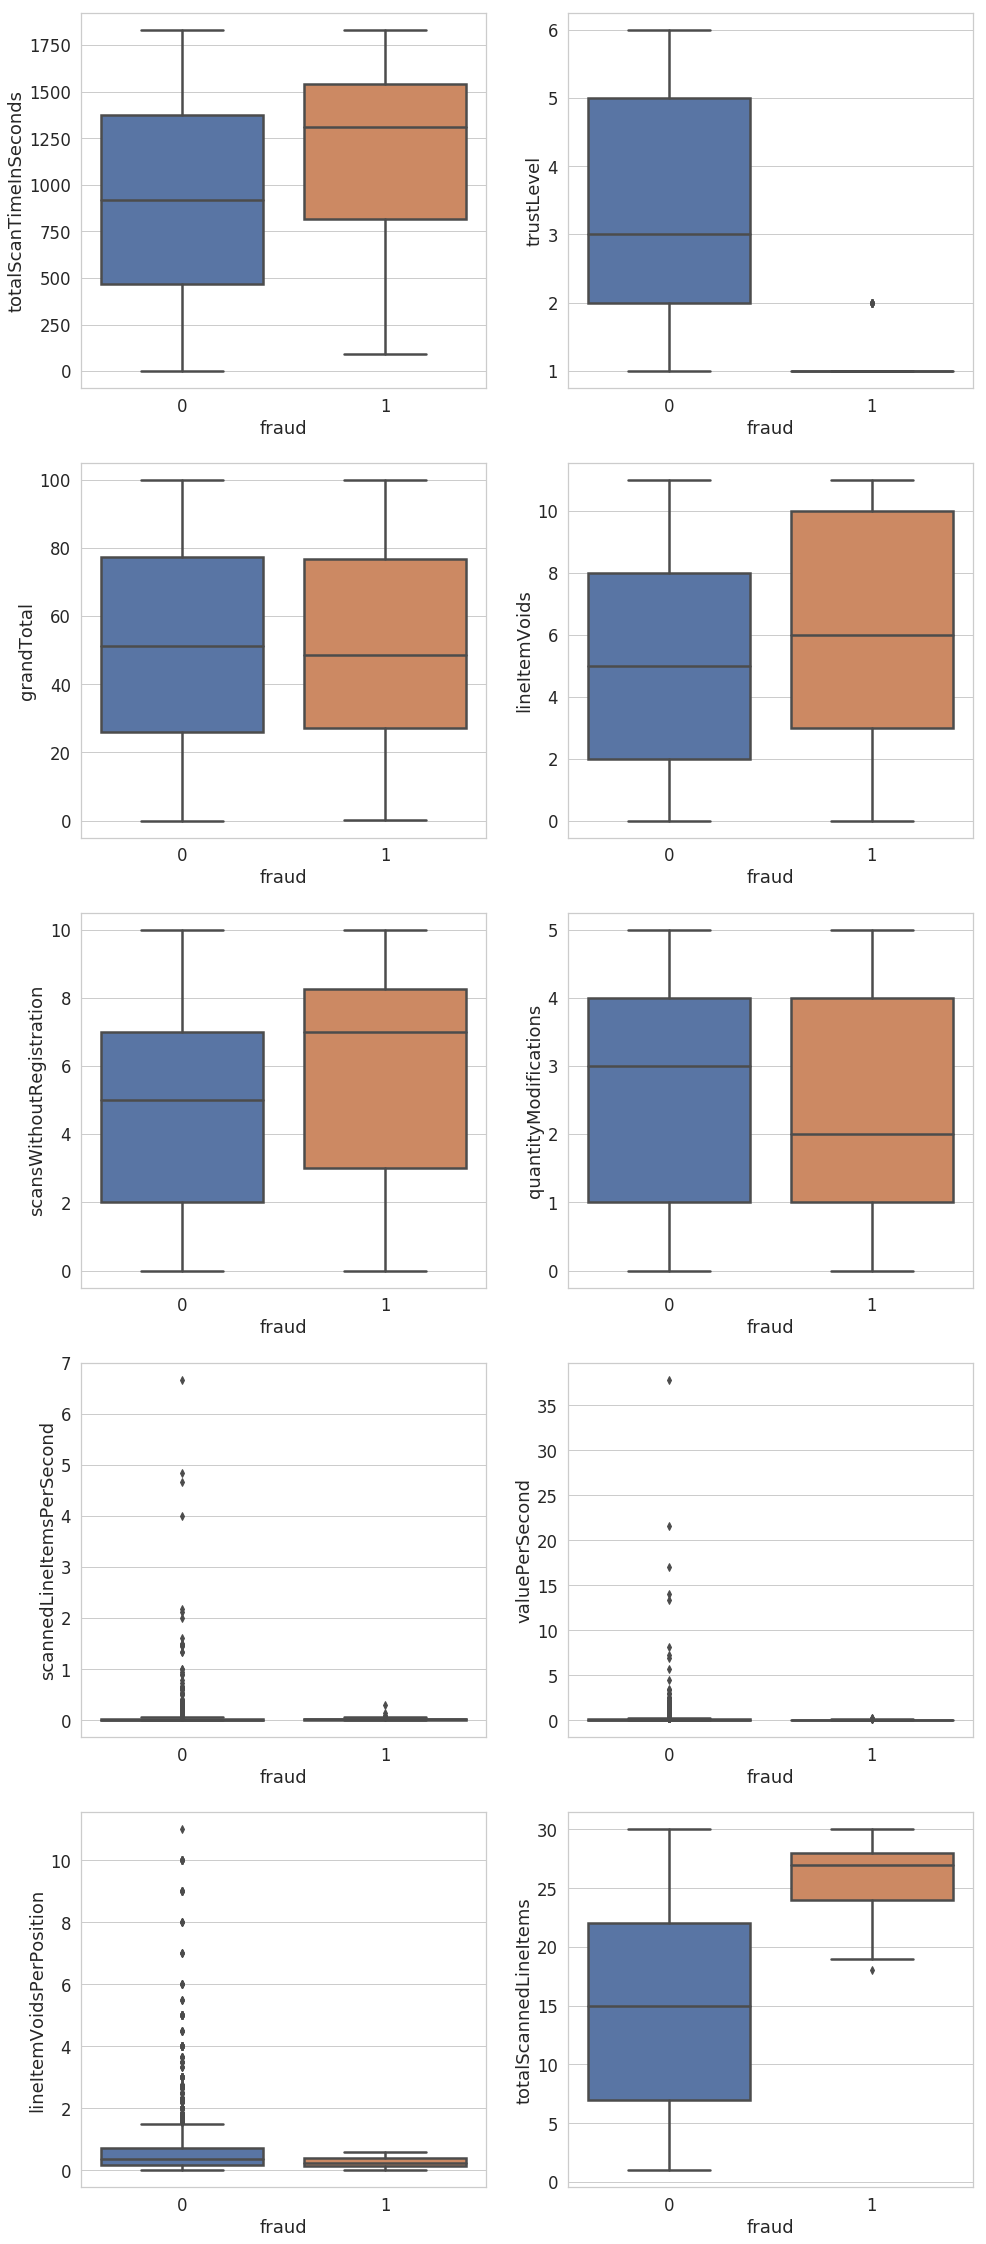

In [31]:
fig, axs = plt.subplots(ncols=2, nrows=5,figsize=(16, 40))

n_fraud_color = sns.xkcd_rgb["medium green"]
fraud_color = sns.xkcd_rgb["pale red"]
#sns.plt.show()
sns.boxplot(x="fraud", y='totalScanTimeInSeconds', data=df_train, ax=axs[0][0])

sns.boxplot(x="fraud", y='trustLevel', data=df_train,ax=axs[0][1])

sns.boxplot(x="fraud", y='grandTotal', data=df_train, ax=axs[1][0])

sns.boxplot(x="fraud", y='lineItemVoids', data=df_train, ax=axs[1][1])

sns.boxplot(x="fraud", y='scansWithoutRegistration', data=df_train, ax=axs[2][0])

sns.boxplot(x="fraud", y='quantityModifications', data=df_train, ax=axs[2][1])

sns.boxplot(x="fraud", y='scannedLineItemsPerSecond', data=df_train, ax=axs[3][0])

sns.boxplot(x="fraud", y='valuePerSecond', data=df_train, ax=axs[3][1])

sns.boxplot(x="fraud", y='lineItemVoidsPerPosition', data=df_train, ax=axs[4][0])

sns.boxplot(x="fraud", y='totalScannedLineItems', data=df_train, ax=axs[4][1])


## Plotting Frauds and Non Frauds seperately with histrograms

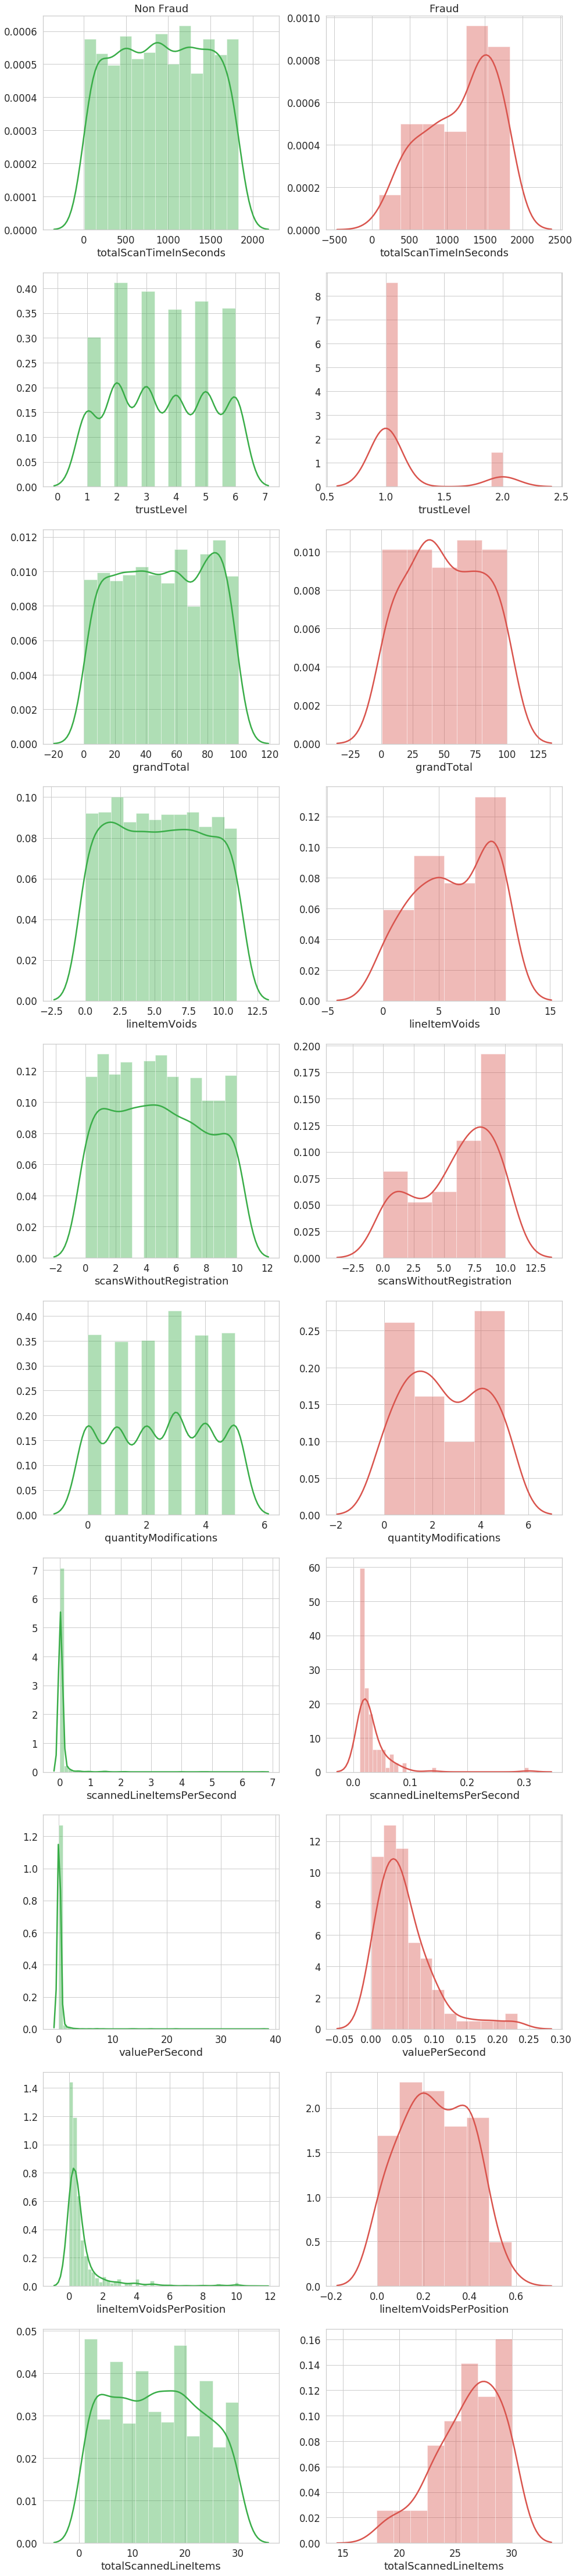

In [32]:
fig, axs = plt.subplots(ncols=2, nrows=10,figsize=(16, 80))
for ax, col in zip(axs[0], ["Non Fraud", "Fraud"]):
    ax.set_title(col)
n_fraud_color = sns.xkcd_rgb["medium green"]
fraud_color = sns.xkcd_rgb["pale red"]
sns.distplot(df_train.totalScanTimeInSeconds[df_train.fraud == 0], ax=axs[0][0],color=n_fraud_color)
sns.distplot(df_train.totalScanTimeInSeconds[df_train.fraud == 1],ax=axs[0][1], color=fraud_color)

sns.distplot(df_train.trustLevel[df_train.fraud == 0],ax=axs[1][0],color=n_fraud_color)
sns.distplot(df_train.trustLevel[df_train.fraud == 1],ax=axs[1][1], color=fraud_color)

sns.distplot(df_train.grandTotal[df_train.fraud == 0], ax=axs[2][0],color=n_fraud_color)
sns.distplot(df_train.grandTotal[df_train.fraud == 1],ax=axs[2][1], color=fraud_color)

sns.distplot(df_train.lineItemVoids[df_train.fraud == 0],ax=axs[3][0],color=n_fraud_color)
sns.distplot(df_train.lineItemVoids[df_train.fraud == 1],ax=axs[3][1], color=fraud_color)

sns.distplot(df_train.scansWithoutRegistration[df_train.fraud == 0], ax=axs[4][0],color=n_fraud_color)
sns.distplot(df_train.scansWithoutRegistration[df_train.fraud == 1],ax=axs[4][1], color=fraud_color)

sns.distplot(df_train.quantityModifications[df_train.fraud == 0],ax=axs[5][0],color=n_fraud_color)
sns.distplot(df_train.quantityModifications[df_train.fraud == 1],ax=axs[5][1], color=fraud_color)

sns.distplot(df_train.scannedLineItemsPerSecond[df_train.fraud == 0], ax=axs[6][0],color=n_fraud_color)
sns.distplot(df_train.scannedLineItemsPerSecond[df_train.fraud == 1],ax=axs[6][1], color=fraud_color)

sns.distplot(df_train.valuePerSecond[df_train.fraud == 0],ax=axs[7][0],color=n_fraud_color)
sns.distplot(df_train.valuePerSecond[df_train.fraud == 1],ax=axs[7][1], color=fraud_color)

sns.distplot(df_train.lineItemVoidsPerPosition[df_train.fraud == 0],ax=axs[8][0],color=n_fraud_color)
sns.distplot(df_train.lineItemVoidsPerPosition[df_train.fraud == 1],ax=axs[8][1], color=fraud_color)

sns.distplot(df_train.totalScannedLineItems[df_train.fraud == 0], ax=axs[9][0],color=n_fraud_color)
sns.distplot(df_train.totalScannedLineItems[df_train.fraud == 1],ax=axs[9][1], color=fraud_color)


## Plotting distribution of frauds and non frauds in one graphic

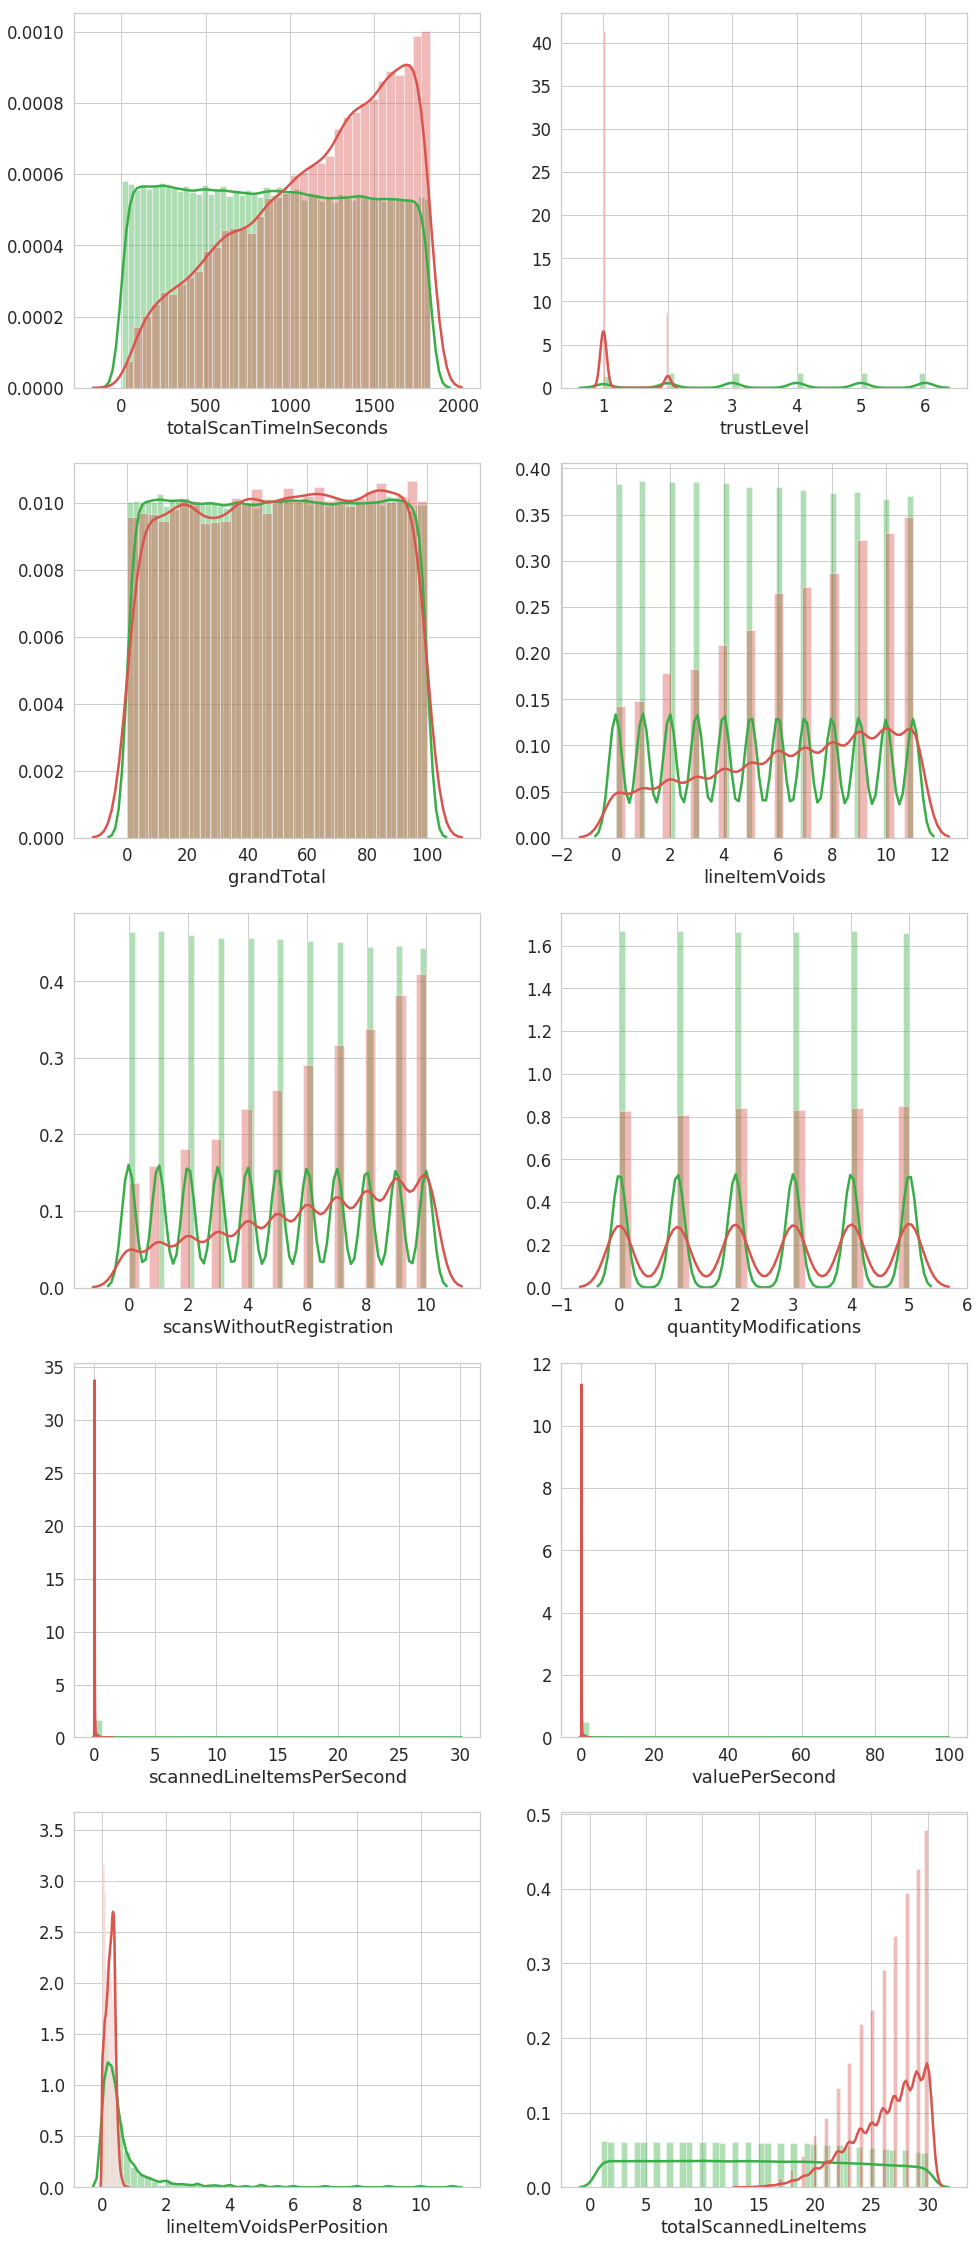

In [17]:
#fig, axs = plt.subplots(ncols=2, nrows=10,figsize=(20, 100))
fig, axs = plt.subplots(ncols=2, nrows=5,figsize=(16, 40))

n_fraud_color = sns.xkcd_rgb["medium green"]
fraud_color = sns.xkcd_rgb["pale red"]
#sns.plt.show()
sns.distplot(df_test_pl.totalScanTimeInSeconds[df_test_pl.fraud == 0], color=n_fraud_color,hist=True,ax=axs[0][0])
sns.distplot(df_test_pl.totalScanTimeInSeconds[df_test_pl.fraud == 1], color=fraud_color,hist=True,ax=axs[0][0])

sns.distplot(df_test_pl.trustLevel[df_test_pl.fraud == 0],color=n_fraud_color,hist=True,ax=axs[0][1])
sns.distplot(df_test_pl.trustLevel[df_test_pl.fraud == 1], color=fraud_color,hist=True,ax=axs[0][1])

sns.distplot(df_test_pl.grandTotal[df_test_pl.fraud == 0], color=n_fraud_color,hist=True,ax=axs[1][0])
sns.distplot(df_test_pl.grandTotal[df_test_pl.fraud == 1], color=fraud_color,hist=True,ax=axs[1][0])

sns.distplot(df_test_pl.lineItemVoids[df_test_pl.fraud == 0],color=n_fraud_color,hist=True,ax=axs[1][1])
sns.distplot(df_test_pl.lineItemVoids[df_test_pl.fraud == 1], color=fraud_color,hist=True,ax=axs[1][1])

sns.distplot(df_test_pl.scansWithoutRegistration[df_test_pl.fraud == 0], color=n_fraud_color,hist=True,ax=axs[2][0])
sns.distplot(df_test_pl.scansWithoutRegistration[df_test_pl.fraud == 1], color=fraud_color,hist=True,ax=axs[2][0])

sns.distplot(df_test_pl.quantityModifications[df_test_pl.fraud == 0],color=n_fraud_color,hist=True,ax=axs[2][1])
sns.distplot(df_test_pl.quantityModifications[df_test_pl.fraud == 1], color=fraud_color,hist=True,ax=axs[2][1])

sns.distplot(df_test_pl.scannedLineItemsPerSecond[df_test_pl.fraud == 0],color=n_fraud_color,hist=True,ax=axs[3][0])
sns.distplot(df_test_pl.scannedLineItemsPerSecond[df_test_pl.fraud == 1], color=fraud_color,hist=True,ax=axs[3][0])

sns.distplot(df_test_pl.valuePerSecond[df_test_pl.fraud == 0],color=n_fraud_color,hist=True,ax=axs[3][1])
sns.distplot(df_test_pl.valuePerSecond[df_test_pl.fraud == 1], color=fraud_color,hist=True,ax=axs[3][1])

sns.distplot(df_test_pl.lineItemVoidsPerPosition[df_test_pl.fraud == 0],color=n_fraud_color,hist=True,ax=axs[4][0])
sns.distplot(df_test_pl.lineItemVoidsPerPosition[df_test_pl.fraud == 1], color=fraud_color,hist=True,ax=axs[4][0])

sns.distplot(df_test_pl.totalScannedLineItems[df_test_pl.fraud == 0],color=n_fraud_color,hist=True,ax=axs[4][1])
sns.distplot(df_test_pl.totalScannedLineItems[df_test_pl.fraud == 1], color=fraud_color,hist=True,ax=axs[4][1])

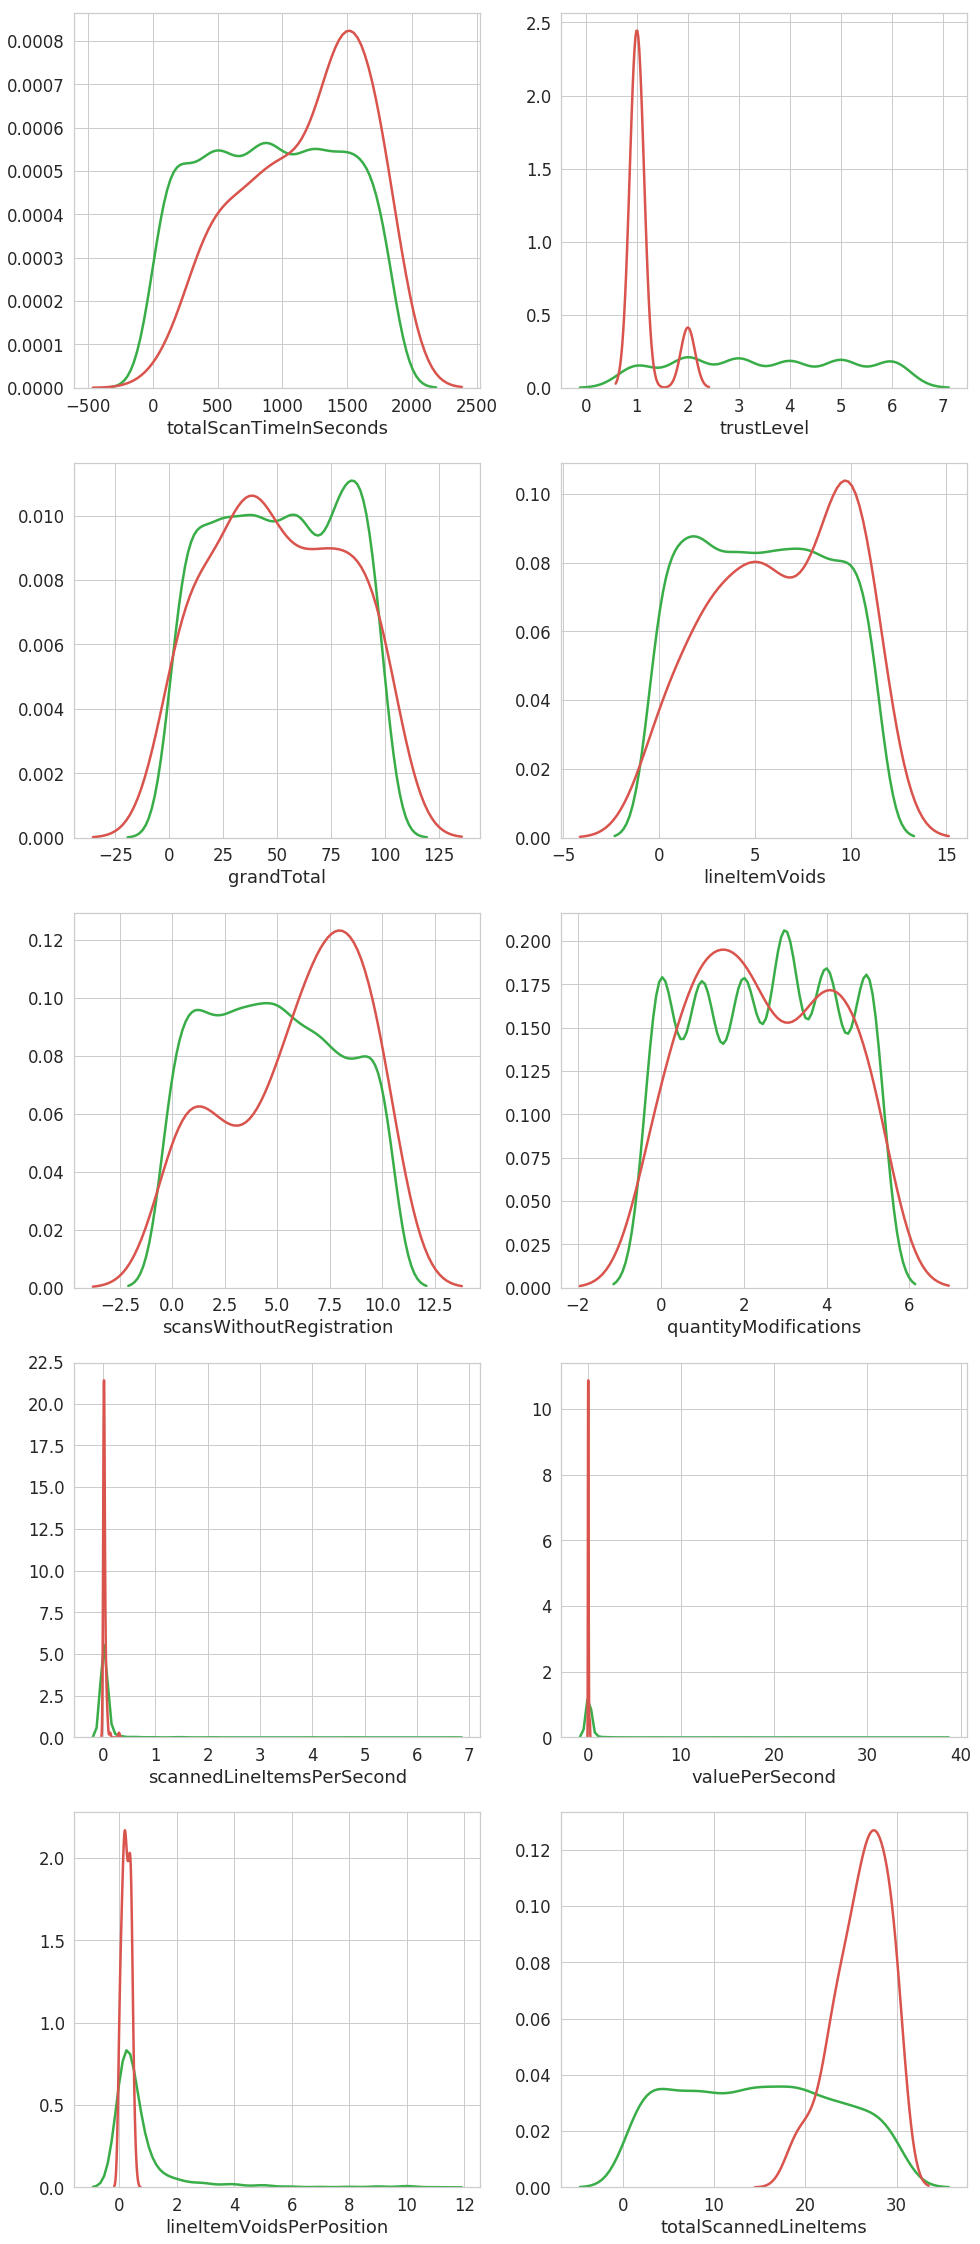

In [16]:
#fig, axs = plt.subplots(ncols=2, nrows=10,figsize=(20, 100))
fig, axs = plt.subplots(ncols=2, nrows=5,figsize=(16, 40))

n_fraud_color = sns.xkcd_rgb["medium green"]
fraud_color = sns.xkcd_rgb["pale red"]
#sns.plt.show()
sns.distplot(df_train.totalScanTimeInSeconds[df_train.fraud == 0], color=n_fraud_color,hist=False,ax=axs[0][0])
sns.distplot(df_train.totalScanTimeInSeconds[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[0][0])

sns.distplot(df_train.trustLevel[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[0][1])
sns.distplot(df_train.trustLevel[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[0][1])

sns.distplot(df_train.grandTotal[df_train.fraud == 0], color=n_fraud_color,hist=False,ax=axs[1][0])
sns.distplot(df_train.grandTotal[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[1][0])

sns.distplot(df_train.lineItemVoids[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[1][1])
sns.distplot(df_train.lineItemVoids[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[1][1])

sns.distplot(df_train.scansWithoutRegistration[df_train.fraud == 0], color=n_fraud_color,hist=False,ax=axs[2][0])
sns.distplot(df_train.scansWithoutRegistration[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[2][0])

sns.distplot(df_train.quantityModifications[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[2][1])
sns.distplot(df_train.quantityModifications[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[2][1])

sns.distplot(df_train.scannedLineItemsPerSecond[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[3][0])
sns.distplot(df_train.scannedLineItemsPerSecond[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[3][0])

sns.distplot(df_train.valuePerSecond[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[3][1])
sns.distplot(df_train.valuePerSecond[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[3][1])

sns.distplot(df_train.lineItemVoidsPerPosition[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[4][0])
sns.distplot(df_train.lineItemVoidsPerPosition[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[4][0])

sns.distplot(df_train.totalScannedLineItems[df_train.fraud == 0],color=n_fraud_color,hist=False,ax=axs[4][1])
sns.distplot(df_train.totalScannedLineItems[df_train.fraud == 1], color=fraud_color,hist=False,ax=axs[4][1])

## Scale Data using Quantile Transform

In [34]:
from sklearn.preprocessing import QuantileTransformer
frauds = df_train.fraud
df_wo_frauds = df_train.drop(['fraud'], axis=1)
heads = list(df_wo_frauds.columns.values)
qt = QuantileTransformer(n_quantiles=10, random_state=0)
df_transformed = pd.DataFrame(qt.fit_transform(df_wo_frauds), columns=heads)
df_transformed['fraud'] = frauds

## Plottin quantile transformed data:  [Quantile Transform](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.quantile_transform.html)

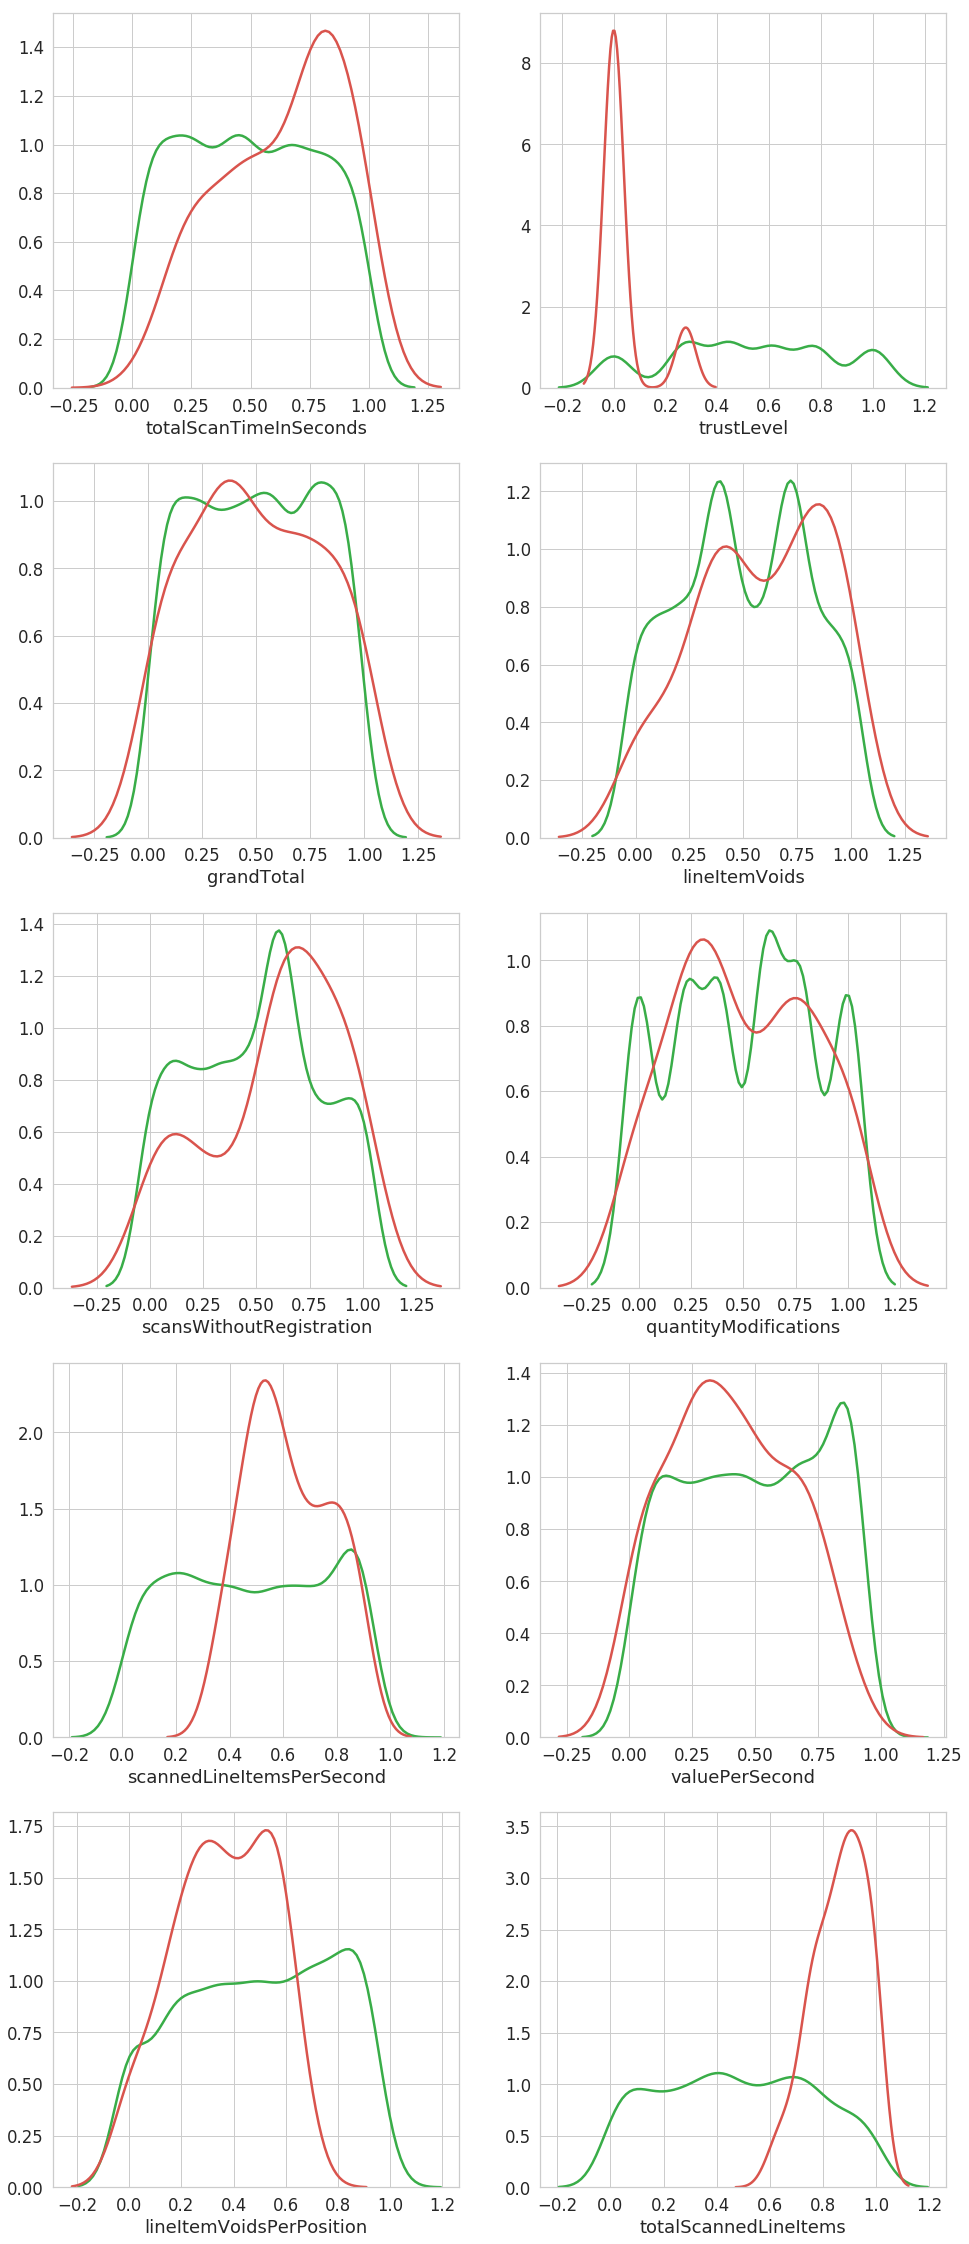

In [35]:
#fig, axs = plt.subplots(ncols=2, nrows=10,figsize=(20, 100))
fig, axs = plt.subplots(ncols=2, nrows=5,figsize=(16, 40))

n_fraud_color = sns.xkcd_rgb["medium green"]
fraud_color = sns.xkcd_rgb["pale red"]
#sns.plt.show()
sns.distplot(df_transformed.totalScanTimeInSeconds[df_transformed.fraud == 0], color=n_fraud_color,hist=False,ax=axs[0][0])
sns.distplot(df_transformed.totalScanTimeInSeconds[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[0][0])

sns.distplot(df_transformed.trustLevel[df_transformed.fraud == 0],color=n_fraud_color,hist=False,ax=axs[0][1])
sns.distplot(df_transformed.trustLevel[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[0][1])

sns.distplot(df_transformed.grandTotal[df_transformed.fraud == 0], color=n_fraud_color,hist=False,ax=axs[1][0])
sns.distplot(df_transformed.grandTotal[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[1][0])

sns.distplot(df_transformed.lineItemVoids[df_transformed.fraud == 0],color=n_fraud_color,hist=False,ax=axs[1][1])
sns.distplot(df_transformed.lineItemVoids[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[1][1])

sns.distplot(df_transformed.scansWithoutRegistration[df_transformed.fraud == 0], color=n_fraud_color,hist=False,ax=axs[2][0])
sns.distplot(df_transformed.scansWithoutRegistration[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[2][0])

sns.distplot(df_transformed.quantityModifications[df_transformed.fraud == 0],color=n_fraud_color,hist=False,ax=axs[2][1])
sns.distplot(df_transformed.quantityModifications[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[2][1])

sns.distplot(df_transformed.scannedLineItemsPerSecond[df_transformed.fraud == 0],color=n_fraud_color,hist=False,ax=axs[3][0])
sns.distplot(df_transformed.scannedLineItemsPerSecond[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[3][0])

sns.distplot(df_transformed.valuePerSecond[df_transformed.fraud == 0],color=n_fraud_color,hist=False,ax=axs[3][1])
sns.distplot(df_transformed.valuePerSecond[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[3][1])

sns.distplot(df_transformed.lineItemVoidsPerPosition[df_transformed.fraud == 0],color=n_fraud_color,hist=False,ax=axs[4][0])
sns.distplot(df_transformed.lineItemVoidsPerPosition[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[4][0])

sns.distplot(df_transformed.totalScannedLineItems[df_transformed.fraud == 0],color=n_fraud_color,hist=False,ax=axs[4][1])
sns.distplot(df_transformed.totalScannedLineItems[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[4][1])

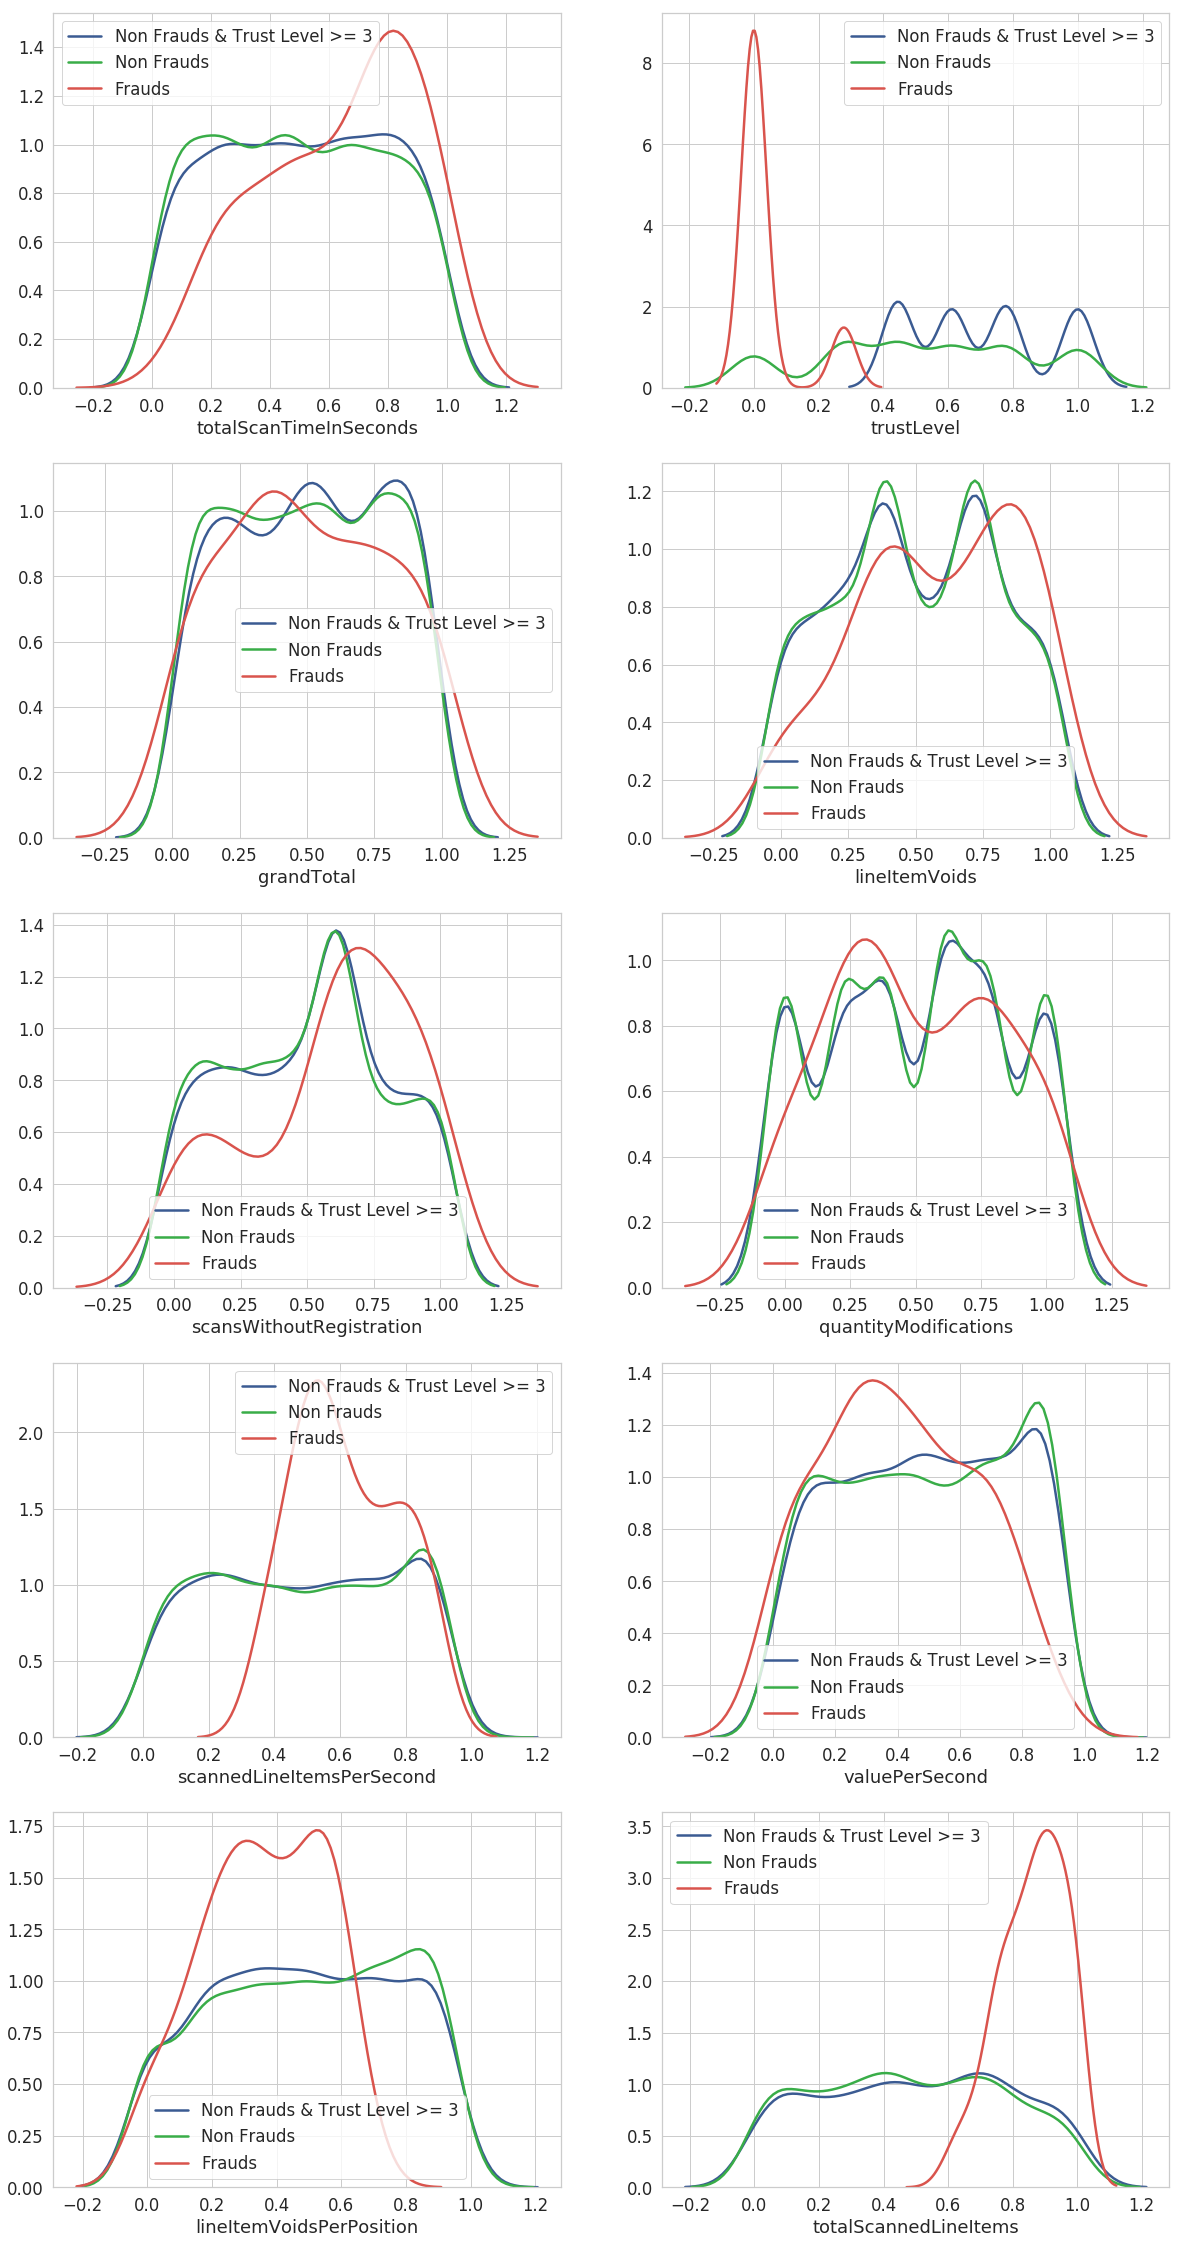

In [40]:
fig, axs = plt.subplots(ncols=2, nrows=5,figsize=(20, 40))

n_fraud_color = sns.xkcd_rgb["medium green"]
n__fraud_gt3_color = sns.xkcd_rgb["denim blue"]
fraud_color = sns.xkcd_rgb["pale red"]
#sns.plt.show()
sns.distplot(df_transformed.totalScanTimeInSeconds[(df_transformed.fraud == 0)& (df_train.trustLevel >=3)], color=n__fraud_gt3_color,hist=False,ax=axs[0][0],label="Non Frauds & Trust Level >= 3")
sns.distplot(df_transformed.totalScanTimeInSeconds[df_transformed.fraud == 0], color=n_fraud_color,hist=False,ax=axs[0][0],label="Non Frauds")
sns.distplot(df_transformed.totalScanTimeInSeconds[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[0][0], label="Frauds")

sns.distplot(df_transformed.trustLevel[(df_transformed.fraud == 0)& (df_train.trustLevel >=3)], color=n__fraud_gt3_color,hist=False,ax=axs[0][1],label="Non Frauds & Trust Level >= 3")
sns.distplot(df_transformed.trustLevel[df_transformed.fraud == 0], color=n_fraud_color,hist=False,ax=axs[0][1],label="Non Frauds")
sns.distplot(df_transformed.trustLevel[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[0][1], label="Frauds")

sns.distplot(df_transformed.grandTotal[(df_transformed.fraud == 0)& (df_train.trustLevel >=3)], color=n__fraud_gt3_color,hist=False,ax=axs[1][0],label="Non Frauds & Trust Level >= 3")
sns.distplot(df_transformed.grandTotal[df_transformed.fraud == 0], color=n_fraud_color,hist=False,ax=axs[1][0],label="Non Frauds")
sns.distplot(df_transformed.grandTotal[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[1][0], label="Frauds")

sns.distplot(df_transformed.lineItemVoids[(df_transformed.fraud == 0)& (df_train.trustLevel >=3)], color=n__fraud_gt3_color,hist=False,ax=axs[1][1],label="Non Frauds & Trust Level >= 3")
sns.distplot(df_transformed.lineItemVoids[df_transformed.fraud == 0], color=n_fraud_color,hist=False,ax=axs[1][1],label="Non Frauds")
sns.distplot(df_transformed.lineItemVoids[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[1][1], label="Frauds")

sns.distplot(df_transformed.scansWithoutRegistration[(df_transformed.fraud == 0)& (df_train.trustLevel >=3)], color=n__fraud_gt3_color,hist=False,ax=axs[2][0],label="Non Frauds & Trust Level >= 3")
sns.distplot(df_transformed.scansWithoutRegistration[df_transformed.fraud == 0], color=n_fraud_color,hist=False,ax=axs[2][0],label="Non Frauds")
sns.distplot(df_transformed.scansWithoutRegistration[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[2][0], label="Frauds")

sns.distplot(df_transformed.quantityModifications[(df_transformed.fraud == 0)& (df_train.trustLevel >=3)], color=n__fraud_gt3_color,hist=False,ax=axs[2][1],label="Non Frauds & Trust Level >= 3")
sns.distplot(df_transformed.quantityModifications[df_transformed.fraud == 0], color=n_fraud_color,hist=False,ax=axs[2][1],label="Non Frauds")
sns.distplot(df_transformed.quantityModifications[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[2][1], label="Frauds")

sns.distplot(df_transformed.scannedLineItemsPerSecond[(df_transformed.fraud == 0)& (df_train.trustLevel >=3)], color=n__fraud_gt3_color,hist=False,ax=axs[3][0],label="Non Frauds & Trust Level >= 3")
sns.distplot(df_transformed.scannedLineItemsPerSecond[df_transformed.fraud == 0], color=n_fraud_color,hist=False,ax=axs[3][0],label="Non Frauds")
sns.distplot(df_transformed.scannedLineItemsPerSecond[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[3][0], label="Frauds")

sns.distplot(df_transformed.valuePerSecond[(df_transformed.fraud == 0)& (df_train.trustLevel >=3)], color=n__fraud_gt3_color,hist=False,ax=axs[3][1],label="Non Frauds & Trust Level >= 3")
sns.distplot(df_transformed.valuePerSecond[df_transformed.fraud == 0], color=n_fraud_color,hist=False,ax=axs[3][1],label="Non Frauds")
sns.distplot(df_transformed.valuePerSecond[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[3][1], label="Frauds")

sns.distplot(df_transformed.lineItemVoidsPerPosition[(df_transformed.fraud == 0)& (df_train.trustLevel >=3)], color=n__fraud_gt3_color,hist=False,ax=axs[4][0],label="Non Frauds & Trust Level >= 3")
sns.distplot(df_transformed.lineItemVoidsPerPosition[df_transformed.fraud == 0], color=n_fraud_color,hist=False,ax=axs[4][0],label="Non Frauds")
sns.distplot(df_transformed.lineItemVoidsPerPosition[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[4][0], label="Frauds")

sns.distplot(df_transformed.totalScannedLineItems[(df_transformed.fraud == 0)& (df_train.trustLevel >=3)], color=n__fraud_gt3_color,hist=False,ax=axs[4][1],label="Non Frauds & Trust Level >= 3")
sns.distplot(df_transformed.totalScannedLineItems[df_transformed.fraud == 0], color=n_fraud_color,hist=False,ax=axs[4][1],label="Non Frauds")
sns.distplot(df_transformed.totalScannedLineItems[df_transformed.fraud == 1], color=fraud_color,hist=False,ax=axs[4][1], label="Frauds")